In [1]:
%pip install sklearn
%pip install seaborn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 22.2 MB 40.8 MB/s            
     |████████████████████████████████| 306 kB 34.8 MB/s            
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn ... done
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 292 kB 13.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
def load_dataframe(data):
    boston_df = pd.read_csv(data)
    return boston_df

In [4]:
data = "boston.csv"
dataset = load_dataframe(data)

In [5]:
def summarize_dataset(dataset):
   print(f"Dataset dimension:\n{dataset.shape}\n\nFirst 10 rows of dataset:\n{dataset.head(10)}\n\nStatistical summary:\n{dataset.describe()}")

In [6]:
def clean_dataset(dataset):
    isnull_sum = dataset.isnull()
    sum = isnull_sum.sum()
    print(f"Check if there are missing values:\n{isnull_sum}\n\nCorrelation matrix:\n{sum}")

In [7]:
def print_histograms(dataset):
    dataset.hist(figsize=(10, 10))
    plt.show()


In [8]:
def compute_correlations_matrix(dataset):
    correlations  = dataset.corr()
    print(correlations['MDEV'])
    df = dataset[['CRIM', 'CHAS', 'AGE', 'LSTAT', 'MDEV']]
    plt.figure(figsize=(8,8))
    sns.pairplot(df)
    plt.show()

In [9]:
def print_scatter_matrix(dataset):
    plt.figure(figsize=(10,8))
    plt.scatter(dataset['LSTAT'], dataset['MDEV'])
    plt.xlabel('The share of the population with low social status',fontsize = 12)
    plt.ylabel('Average price of real estate, thousand dollars', fontsize= 12)
    plt.title('Social status of the population and housing prices',fontsize = 15)
    plt.figure(figsize=(10,8))
    plt.scatter(dataset['RM'], dataset['MDEV'])
    plt.xlabel('Average number of rooms',fontsize = 12)
    plt.ylabel('Average real estate price, thousand dollars', fontsize= 12)
    plt.title('Average number of rooms and house prices',fontsize = 15)
    plt.figure(figsize=(10,8))
    plt.scatter(dataset['LSTAT'], dataset['AGE'])
    plt.xlabel('AGE',fontsize = 20)
    plt.ylabel('LSTAT', fontsize= 20)
    plt.title('Here is an example, LSTAT against AGE',fontsize = 15)
    plt.show()

In [10]:
def boston_fit_model(dataset):
    model_dataset = dataset[["RM","MDEV"]]
    regressor = sklearn.linear_model.LinearRegression()
    x = model_dataset.iloc[:, :-1].values
    y = model_dataset.iloc[:, 1].values
    X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.25, random_state = 42)
    regressor.fit(X_train, y_train)
    return regressor,X_train, X_test, y_train, y_test
    # df = regressor.predict(X_test)
    # return df[:5]
    # print(X_train.shape, y_train.shape)
    # print(X_test.shape, y_test.shape)

In [11]:
def boston_predict(estimator, array_to_predict):
    df = estimator.predict(array_to_predict)
    return df

In [12]:
data = boston_fit_model(dataset)[2]
estimator = boston_fit_model(dataset)[0]
# estimator

Dataset dimension:
(506, 14)

First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  

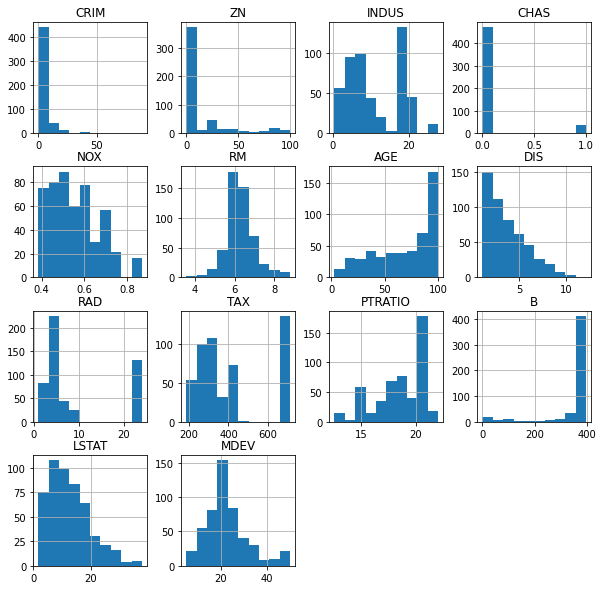

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


<Figure size 576x576 with 0 Axes>

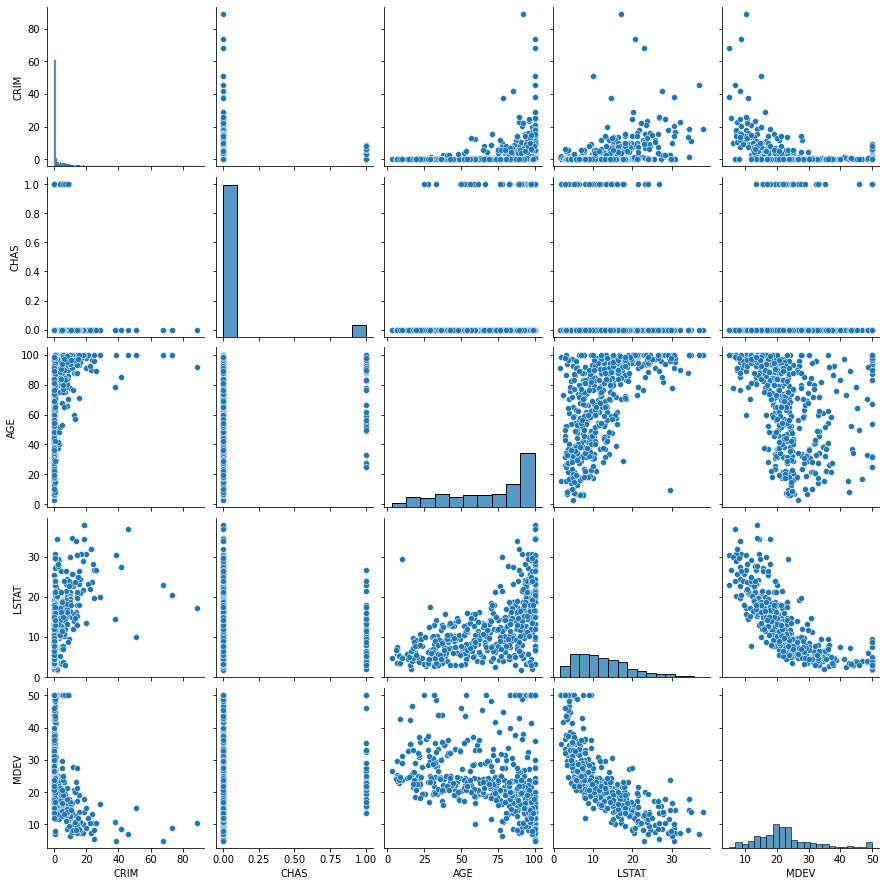

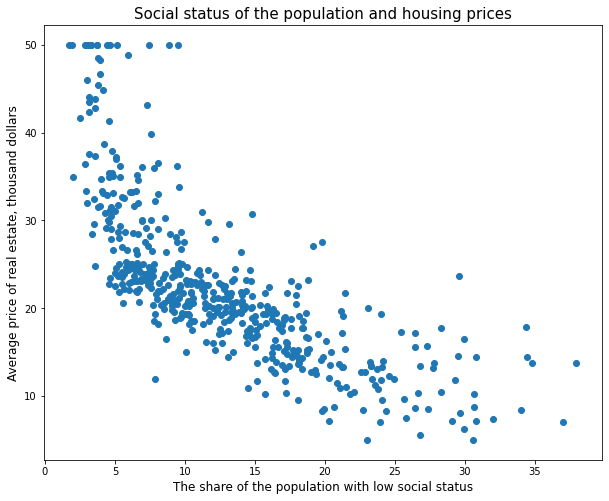

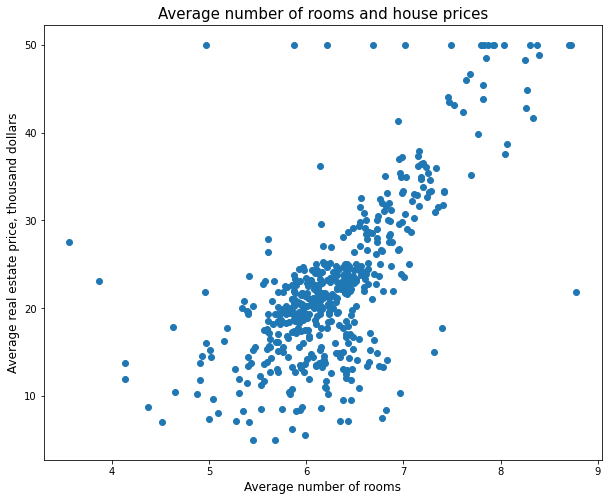

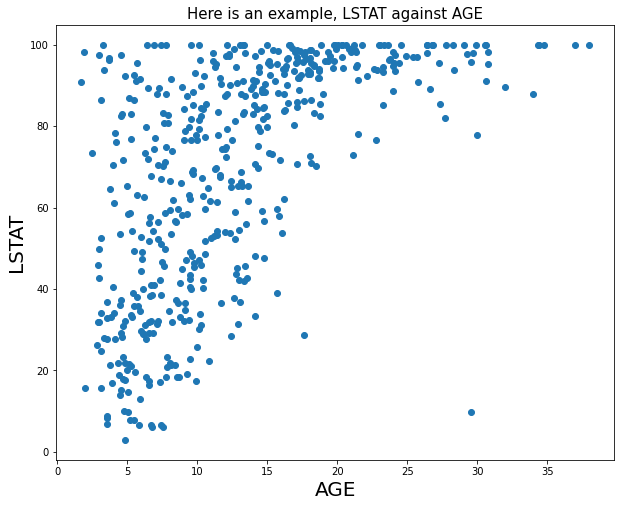

In [13]:
summarize_dataset(dataset)
clean_dataset(dataset)
print_histograms(dataset)
compute_correlations_matrix(dataset)
print_scatter_matrix(dataset)
boston_fit_model(dataset)
boston_predict(estimator, data)
base_test = boston_fit_model(dataset)[4]
prediction = boston_predict(estimator, data)
# base_test
# prediction

In [14]:
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(base_test, prediction)))

In [15]:
print_model_prediction_evaluator(base_test, prediction)

Mean Absolute Error: 4.269376143548843
Mean Squared Error: 42.749639527404845
Root Mean Squared Error: 6.538320849224581
